In [ ]:
#   --- Step ---   : Upload the File to Google Colab
import pandas as pd
#   --- Step ---   : Load the Dataset in Google Colab
df = pd.read_csv("/train.csv")
print(df.head())

print(df.info())

print(df.isnull().sum())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:
#   --- Step ---   : Data Cleaning & Preprocessing

# Convert 'Order Date' & 'Ship Date' to datetime format (handling mixed formats)
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors='coerce')

# Check for any NaT (Not a Time) values
print(df[["Order Date", "Ship Date"]].isnull().sum())



# 1️⃣ dayfirst=True → Handles dates like 15/04/2018 (DD/MM/YYYY format).
# 2️⃣ errors='coerce' → If a date format is unrecognized, it replaces it with NaT (Not a Time) instead of throwing an error.

Order Date    0
Ship Date     0
dtype: int64


<ipython-input-9-a5a1fd611511>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="coolwarm")


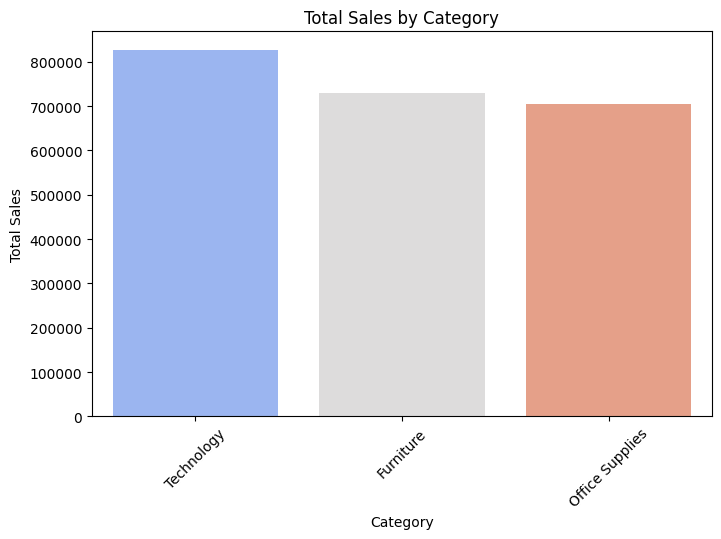

In [ ]:
#   --- Step ---   : Exploratory Data Analysis (EDA)  to analyze the data to extract insights

#   --- Step ---   : 1. Total Sales by Category

import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by category
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="coolwarm")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#   --- Step ---   : 2. Top 5 Best-Selling Products

# Group by product and sum sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)

# Display top products
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


<ipython-input-11-c29312053f18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")


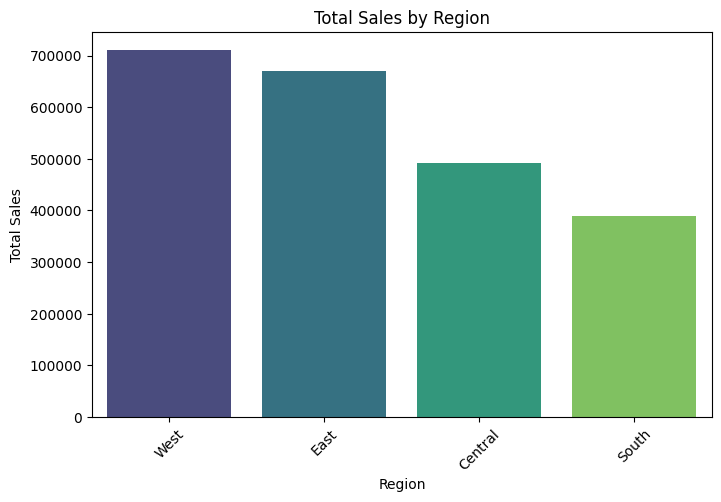

In [ ]:
#   --- Step ---   : 2. Most Profitable Regions


# Group by region and sum sales
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot sales by region
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-936c8745552b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")


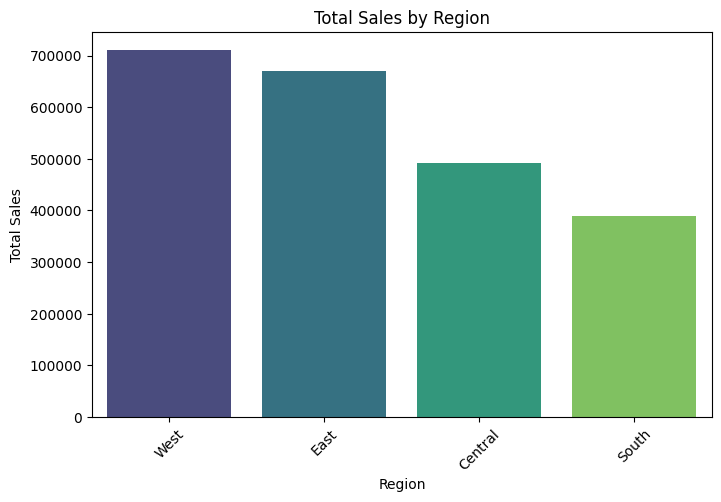

In [ ]:
#   --- Step ---   : 3. Most Profitable Regions

# Group by region and sum sales
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot sales by region
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()



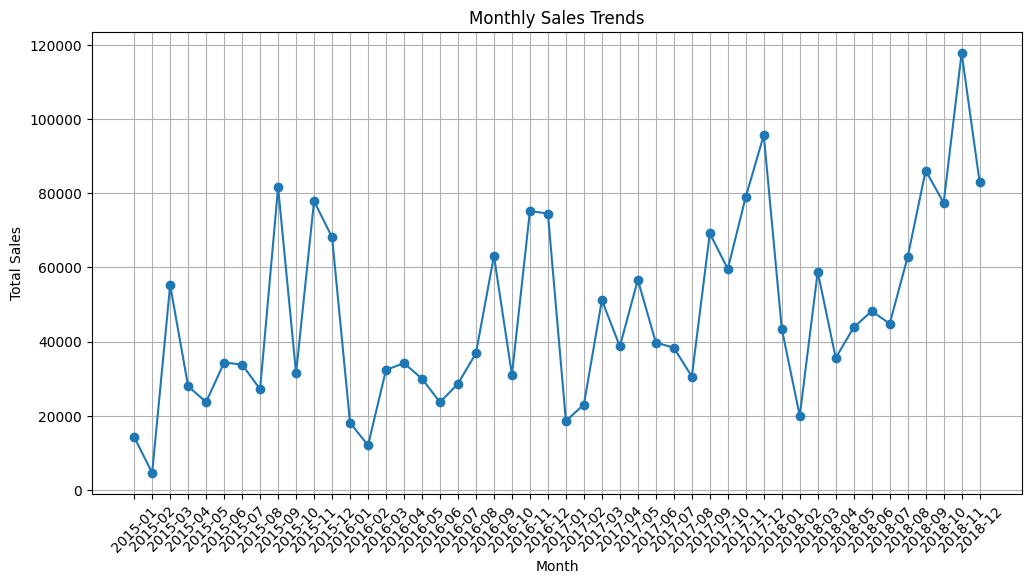

In [ ]:
#   --- Step ---   : 4. Monthly Sales Trends

# Extract month and year from Order Date
df["Year-Month"] = df["Order Date"].dt.to_period("M")

# Group by month and sum sales
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
#   --- Step ---   : SQL Analysis on Sales Data

#   --- Step ---   : 1. Install & Import SQLite

import sqlite3

# Create an in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load DataFrame into SQL database
# Convert 'Year-Month' column to string format (to avoid SQLite error)
df["Year-Month"] = df["Year-Month"].astype(str)

# Reload into SQLite
conn = sqlite3.connect(":memory:")  # Create in-memory database
df.to_sql("sales_data", conn, index=False, if_exists="replace")

# Verify table exists
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  # Should display 'sales_data'


[('sales_data',)]


In [ ]:
#   --- Step ---   : 2. Run SQL Queries

#   --- 1. Total Sales by Region

query = """
SELECT Region, SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY Region
ORDER BY Total_Sales DESC;
"""
result = pd.read_sql(query, conn)
print(result)


    Region  Total_Sales
0     West  710219.6845
1     East  669518.7260
2  Central  492646.9132
3    South  389151.4590


In [ ]:
#   --- 2. Top 5 Best-Selling Products

query = """
SELECT "Product Name", SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY "Product Name"
ORDER BY Total_Sales DESC
LIMIT 5;
"""
result = pd.read_sql(query, conn)
print(result)


                                        Product Name  Total_Sales
0              Canon imageCLASS 2200 Advanced Copier    61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...    27453.384
2  Cisco TelePresence System EX90 Videoconferenci...    22638.480
3       HON 5400 Series Task Chairs for Big and Tall    21870.576
4         GBC DocuBind TL300 Electric Binding System    19823.479


In [ ]:
#   --- 3. Find Sales in a Specific Date Range

query = """
SELECT "Order Date", SUM(Sales) AS Daily_Sales
FROM sales_data
WHERE "Order Date" BETWEEN '2017-01-01' AND '2017-12-31'
GROUP BY "Order Date"
ORDER BY "Order Date";
"""
result = pd.read_sql(query, conn)
print(result)


              Order Date  Daily_Sales
0    2017-01-02 00:00:00      405.920
1    2017-01-03 00:00:00     2095.830
2    2017-01-04 00:00:00     1069.220
3    2017-01-05 00:00:00      255.904
4    2017-01-07 00:00:00       83.576
..                   ...          ...
312  2017-12-25 00:00:00    10488.055
313  2017-12-26 00:00:00     1829.418
314  2017-12-27 00:00:00      959.490
315  2017-12-29 00:00:00     1277.680
316  2017-12-30 00:00:00      773.774

[317 rows x 2 columns]


In [ ]:
#   --- Step ---   : Export Results to Excel (With Pivot Tables & Charts)

#   --- Step ---   : 1. Install openpyxl (If Not Installed)
!pip install openpyxl


In [ ]:
#   --- Step ---   : 2. Export Data to Excel

import openpyxl

# Define file path
excel_file = "/sales_analysis.xlsx"

# Create a Pandas Excel writer using openpyxl
with pd.ExcelWriter(excel_file, engine="openpyxl") as writer:
    result.to_excel(writer, sheet_name="Daily Sales", index=False)
    sales_by_region.to_excel(writer, sheet_name="Sales by Region")
    top_products.to_excel(writer, sheet_name="Top Products")

print(f"Excel file saved: {excel_file}")


Excel file saved: /sales_analysis.xlsx


In [ ]:
#   --- Step ---   : Download Excel File to Your PC

from google.colab import files
files.download("/sales_analysis.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:

#   --- Step ---   : Add Pivot Tables in Excel (Manually) on Excel

#   --- Step ---   : Create a Pivot Table for Sales Trends

#   --- Step ---   : Convert Daily Sales into Monthly Sales

#   --- Step ---   : Create a Line Chart for Sales Trends

#   --- Step ---   : Create a Pivot Table for Sales by Region

#   --- Step ---   : Create a Bar Chart for Regional Sales

